# Overview


Today's lecture has two main focuses:

__Part 1: Wrapping up Data Collection:__ We're finishing our dive into data collection using the OpenAlex API. We'll gather author info from the Computational Social Science field, like countries and citation counts, along with publication details such as titles and abstracts. The aim here is to get comfortable handling quite large datasets. *A little warning*: You will need to retrieve and handle a significant amount of data. If you find the process tedious and overwhelming, you are not alone! That's just a normal part of dealing with real data. But don't worry, I'll guide you through step by step, and I'm always here to help, on Teams or in class. There are three simple rules for success:
- Follow thoroughly the step-by-step instructions.
- Stay on top of your work weekly. 
- If you are stuck, come and talk to me during class/ask me via Teams.

__Parts 2 and 3: Introduction to Data Visualization + Visualizing Distributions:__ Next, we shift to a lighter topic: Data Visualization. There will be some video lectures on general aspects of Data Visualization. Then we'll start with visualizing histograms. You may feel already confident with plotting histograms, but we'll explore new angles, especially when it comes to visualizing data that's spread out across a wide range. You will start seeing the value of the data we've collected and starting to analyze it in practical ways.

So, let's get through the data collection together and gear up for some visualization work!

## Part 1: Wrapping up the data collection

You're now equipped to tackle more challenging tasks with the OpenAlex API. In our upcoming exercises, we'll wrap up the data collection phase. You'll be managing many requests. This makes it crucial to write code that's not just functional but also efficient. I'll guide you through optimizing your approach.

**In the first exercise**, you'll identify the research articles authored by the participants of the IC2S2 2024 conference (those we've found in Week 2, Exercise 2). Let's refer to them as the *IC2S2 authors*. You're focusing on a group of only approximately 1000 researchers, which might tempt you to use a less efficient coding approach. But, it will be already vital to aim for efficiency. The code you develop will serve as a foundation for the next, more demanding exercise. So, developing an efficient solution here will save you time later.

**In the second exercise**, we'll expand our scope to include the collaborators of the IC2S2 authors. Let's refer to them as the *IC2S2 co-authors*. The underlying idea here is the following: researchers do not attend all conferences, even if they are relevant to what they do. This is why we go one step forward and study also the co-authors, to get an overview of the Computational Social Science field. This exercise will introduce a significant increase in the volume of data you'll manage. But if you have developed efficient code in the first exercise, everything will be smooth!

**When you are done with the two exercises: Go on DTU Learn and fill in the survey *[Week 3 - The final dataset](https://learn.inside.dtu.dk/d2l/lms/survey/user/attempt/survey_start_frame.d2l?si=31325&ou=242061)***
                    

> **Exercise 1: Collecting Research Articles from IC2S2 Authors**
>
>In this exercise, we'll leverage the OpenAlex API to gather information on research articles authored by participants of the IC2S2 2024 conference, referred to as *IC2S2 authors*. **Before you start, please ensure you read through the entire exercise.**
>
> 
> **Steps:**
>  
> 1. **Retrieve Data:** Starting with the *authors* you identified in Week 2, Exercise 2, use the OpenAlex API [works endpoint](https://docs.openalex.org/api-entities/works) to fetch the research articles they have authored. For each article, retrieve the following details:
>    - _id_: The unique OpenAlex ID for the work.
>    - _publication_year_: The year the work was published.
>    - _cited_by_count_: The number of times the work has been cited by other works.
>    - _author_ids_: The OpenAlex IDs for the authors of the work.
>    - _title_: The title of the work.
>    - _abstract_inverted_index_: The abstract of the work, formatted as an inverted index.
> 
>     **Important Note on Paging:** By default, the OpenAlex API limits responses to 25 works per request. For more efficient data retrieval, I suggest to adjust this limit to 200 works per request. Even with this adjustment, you will need to implement pagination to access all available works for a given query. This ensures you can systematically retrieve the complete set of works beyond the initial 200. Find guidance on implementing pagination [here](https://docs.openalex.org/how-to-use-the-api/get-lists-of-entities/paging#cursor-paging).
>
> 2. **Data Storage:** Organize the retrieved information into two Pandas DataFrames and save them to two files in a suitable format:
>    - The *IC2S2 papers* dataset should include: *id, publication\_year, cited\_by\_count, author\_ids*.
>    - The *IC2S2 abstracts* dataset should include: *id, title, abstract\_inverted\_index*.
>  
>
> **Filters:**
> To ensure the data we collect is relevant and manageable, apply the following filters:
> 
>    - Only include *IC2S2 authors* with a total work count between 5 and 5,000.
>    - Retrieve only works that have received more than 10 citations.
>    - Limit to works authored by fewer than 10 individuals.
>    - Include only works relevant to Computational Social Science (focusing on: Sociology OR Psychology OR Economics OR Political Science) AND intersecting with a quantitative discipline (Mathematics OR Physics OR Computer Science), as defined by their [Concepts](https://docs.openalex.org/api-entities/works/work-object#concepts). *Note*: here we only consider Concepts at *level=0* (the most coarse definition of concepts). 
>
> **Efficiency Tips:**
> Writing efficient code in this exercise is **crucial**. To speed up your process:
> - **Apply filters directly in your request:** When possible, use the [filter parameter](https://docs.openalex.org/api-entities/works/filter-works) of the *works* endpoint to apply the filters above directly in your API request, ensuring only relevant data is returned. Learn about combining multiple filters [here](https://docs.openalex.org/how-to-use-the-api/get-lists-of-entities/filter-entity-lists).  
> - **Bulk requests:** Instead of sending one request for each author, you can use the [filter parameter](https://docs.openalex.org/api-entities/works/filter-works) to query works by multiple authors in a single request. *Note: My testing suggests that can only include up to 25 authors per request.*
> - **Use multiprocessing:** Implement multiprocessing to handle multiple requests simultaneously. I highly recommend [Joblib’s Parallel](https://joblib.readthedocs.io/en/stable/) function for that, and [tqdm](https://tqdm.github.io/) can help monitor progress of your jobs. Remember to stay within [the rate limit](https://docs.openalex.org/how-to-use-the-api/rate-limits-and-authentication) of 10 requests per second.
>
>
>   
> For reference, employing these strategies allowed me to fetch the data in about 30 seconds using 5 cores on my laptop. I obtained a dataset of approximately 25 MB (including both the *IC2S2 abstracts* and *IC2S2 papers* files).
> 
>
> **Data Overview and Reflection questions:** Answer the following questions: 
> - **Dataset summary.** How many works are listed in your *IC2S2 papers* dataframe? How many unique researchers have co-authored these works? 
> - **Efficiency in code.** Describe the strategies you implemented to make your code more efficient. How did your approach affect your code's execution time?
> - **Filtering Criteria and Dataset Relevance** Reflect on the rationale behind setting specific thresholds for the total number of works by an author, the citation count, the number of authors per work, and the relevance of works to specific fields. How do these filtering criteria contribute to the relevance of the dataset you compiled? Do you believe any aspects of Computational Social Science research might be underrepresented or overrepresented as a result of these choices?

In [47]:
from tqdm import tqdm
import os
from joblib import Parallel,delayed
import pandas as pd
import requests
import time

In [54]:
df_author = pd.read_csv("test.csv", index_col=0)
df_author = df_author[(df_author["works_count"]>5) & (df_author["works_count"]<5000)]
df_author.dropna(inplace=True)
df_author

,id,display_name,works_api_url,works_count,cited_by_count,h_index,country_code
0,https://openalex.org/A5101854927,Hazem Ibrahim,https://api.openalex.org/works?filter=author.i...,25,649,12,FI
1,https://openalex.org/A5037300629,Nouar AlDahoul,https://api.openalex.org/works?filter=author.i...,88,562,14,AE
2,https://openalex.org/A5007282319,Talal Rahwan,https://api.openalex.org/works?filter=author.i...,167,4043,32,AE
3,https://openalex.org/A5018129441,Yasir Zaki,https://api.openalex.org/works?filter=author.i...,125,1316,16,AE
4,https://openalex.org/A5058939619,Alvin Zhou,https://api.openalex.org/works?filter=author.i...,59,1006,14,US
...,...,...,...,...,...,...,...
1109,https://openalex.org/A5059356040,Elisabeth Stockinger,https://api.openalex.org/works?filter=author.i...,6,52,2,CH
1110,https://openalex.org/A5017688180,Julian Nyarko,https://api.openalex.org/works?filter=author.i...,48,1704,9,US
1112,https://openalex.org/A5067807487,Emma Pierson,https://api.openalex.org/works?filter=author.i...,103,6002,23,US
1113,https://openalex.org/A5003701992,Emma Wang,https://api.openalex.org/works?filter=author.i...,6,326,3,US


Get consepts ids

In [ ]:
params = {
    "filter": "display_name",
    "per-page": "200",
    "cursor": cursor_func(),
}
r = requests.get("https://api.openalex.org/concepts?")
part1 = ["Sociology", "Psychology", "Economics", "Political Science"]
part2 = ["Mathematics", "Physics", "Computer Science"]

In [118]:
def filter_str():
    test = "display_name.search:Alvin Zhou"
    cited_filter = "cited_by_count:>10"
     #limit_filter = "per-page=200"
    filter_string = ",".join([test,cited_filter])
    return filter_string

def cursor_func(cursor="*"):
    return {cursor}
filter_str()

'display_name.search:Alvin Zhou,cited_by_count:>10'

In [119]:
cursor = '*'

params = {
    "filter": filter_str(),
    "per-page": "200",
    "cursor": cursor_func(),
}

In [120]:
r = requests.get("https://api.openalex.org/authors?", params=params)
r.status_code, r.text

(200,
 '{"meta":{"count":2,"db_response_time_ms":177,"page":null,"per_page":200,"next_cursor":"Ils0NzAuNjg4NzUsIDQsICdodHRwczovL29wZW5hbGV4Lm9yZy9BNTAwOTQyNzE0MiddIg==","groups_count":null},"results":[{"id":"https://openalex.org/A5058939619","orcid":"https://orcid.org/0000-0001-5410-9712","display_name":"Alvin Zhou","display_name_alternatives":["Alvin Y. Zhou","Alvin Zhou"],"relevance_score":2344.536,"works_count":59,"cited_by_count":1006,"summary_stats":{"2yr_mean_citedness":4.6,"h_index":14,"i10_index":18},"ids":{"openalex":"https://openalex.org/A5058939619","orcid":"https://orcid.org/0000-0001-5410-9712","scopus":"http://www.scopus.com/inward/authorDetails.url?authorID=57208899179&partnerID=MN8TOARS"},"affiliations":[{"institution":{"id":"https://openalex.org/I130238516","ror":"https://ror.org/017zqws13","display_name":"University of Minnesota","country_code":"US","type":"funder","lineage":["https://openalex.org/I130238516"]},"years":[2024,2023,2022,2021,2019,2018]},{"institution":{

In [ ]:
# test = df_author["works_api_url"][2]
def testing(test):
    limit_filter = "per-page=200&"
    cited_filter = "filter=cited_by_count:>10&"
    cursor_start = "cursor={}&" 
    cursor = '*'
    part1 = ["Sociology", "Psychology", "Economics", "Political Science"]
    part2 = ["Mathematics", "Physics", "Computer Science"]
    return_list = []
    while cursor:
        url_filters = test+limit_filter+cited_filter+cursor_start
        # set cursor value and request page from OpenAlex
        url = url_filters.format(cursor)
        r = requests.get(url)

        if r.status_code == 429:  # Too Many Requests
            time.sleep(1)
            r = requests.get(url)
        
        if r.status_code != 200:
            print(r.status_code, r.text)
            break

        page_with_results = r.json()
        results = page_with_results['results']
        for i in range(len(results)):
            if len(results[i].get("authorships")) >= 10:
                continue
            
            concepts = results[i].get("concepts")
            part1_bool = False
            part2_bool = False
            # print(concepts)
            for j in range(len(concepts)):
                if concepts[j].get("level") != 0:
                    continue

                if concepts[j].get("display_name") in part1:
                    part1_bool = True

                if concepts[j].get("display_name") in part2:
                    part2_bool = True

            if part1_bool and part2_bool:
                work = results[i]
                return_list.append({
                    "id": work.get("id"),
                    "publication_year": work.get("publication_year"),
                    "cited_by_count": work.get("cited_by_count"),
                    "author_ids": [i.get("author").get("id") for i in work.get("authorships")],
                    "title": work.get("title"),
                    "abstract_inverted_index": work.get("abstract_inverted_index")
                })

        # update cursor to meta.next_cursor
        cursor = page_with_results['meta']['next_cursor']
    return return_list


In [29]:
# Parallel processing with Joblib, limiting to 4 concurrent requests at a time
n_jobs = 10  # Number of parallel threads
urls = df_author["works_api_url"].tolist()

# Use tqdm to display the progress bar for the list of URLs
results = Parallel(n_jobs=n_jobs)(
    delayed(testing)(url) for url in tqdm(urls, desc="Processing URLs", unit="url")
)







Processing URLs:   2%|▏         | 19/1116 [05:13<5:01:37, 16.50s/url]







































































































































































































































































































































Processing URLs: 100%|██████████| 1116/1116 [18:20<00:00,  1.01url/s]


In [56]:
results_as_list = []
for l in results:
    if l != []:
        results_as_list += l
df = pd.DataFrame(results_as_list, columns=["id","publication_year","cited_by_count","author_ids","title","abstract_inverted_index"])
df.to_csv("week3.csv")

Sociology: https://openalex.org/C144133560
Psychology: https://openalex.org/C15744967
Economics: https://openalex.org/C162324750
Political Science: https://openalex.org/C17744445

Mathematics: https://openalex.org/C33923547
Physics: https://openalex.org/C121332964
Computer Science: https://openalex.org/C41008148

In [ ]:
# Define the maximum number of requests per second
MAX_REQUESTS_PER_SECOND = 10
SECONDS_BETWEEN_REQUESTS = 1 / MAX_REQUESTS_PER_SECOND

# Prepare the list of URLs to request
urls = df_author["works_api_url"].tolist()

# Initialize a counter to track the results
counter = 0

def process_url(url):
    global counter
    time.sleep(SECONDS_BETWEEN_REQUESTS)  # Sleep to avoid exceeding request limit
    
    r = requests.get(url)
    if r.status_code != 200:
        print(f"Error {r.status_code} for URL: {url}")
        return None
    
    page_with_results = r.json()
    results = page_with_results['results']
    local_counter = 0
    
    for result in results:
        part1_bool = False
        part2_bool = False
        if len(result.get("authorships", [])) >= 10:
            continue
        
        concepts = result.get("concepts", [])

        for j in range(len(concepts)):
            if concepts[j].get("level") != 0:
                continue

            if concepts[j].get("display_name") in part1:
                part1_bool = True

            if concepts[j].get("display_name") in part2:
                part2_bool = True

        
        if part1_bool and part2_bool:
            print(result.get("concepts"))
            local_counter += 1
    tqdm.write(f"Local Counter: {local_counter}")
    return local_counter

# Parallel processing with Joblib, limiting to 4 concurrent requests at a time
n_jobs = 10  # Number of parallel threads

# Use tqdm to display the progress bar for the list of URLs
results = Parallel(n_jobs=n_jobs)(
    delayed(process_url)(url) for url in tqdm(urls, desc="Processing URLs", unit="url")
)

# Aggregate the results
counter = sum([res for res in results if res is not None])

print(f"Total results processed: {counter}")






























































































Processing URLs: 100%|██████████| 925/925 [00:51<00:00, 18.05url/s]


Total results processed: 1385


> **Exercise 2: Collecting Data from IC2S2 Co-Authors**
> In this exercise, we aim to collect detailed information on the co-authors of the IC2S2 authors and their publications. You'll find that the code you developed previously can be efficiently reused here. **Please ensure you read the entire exercise before beginning.**
> 
> **Steps:**
>  
> 1. **Retreive information about IC2S2 co-authors.** Start with the unique author IDs in the *IC2S2 papers* dataset you compiled in Exercise 1 above. Use the [OpenAlex API authors endpoint](https://docs.openalex.org/api-entities/authors) for each author, to collect the following information: 
>     -  _display\_name_: The name of the author as a single string.
>     -  _works\_api\_url_: A URL that will get you a list of all this author's works.
>     -  _h\_index_ : The h-index for this author.
>     -  _works\_count_: The number of  Works this this author has created.
>     -  _country\_code_: The country code of their last known institution
>       
>     **Important:** Exclude the *IC2S2 authors* from this query since you already have their data. 
>     **Hint:** Remember you can collect data in bulks.
>    
> 3. **Data Storage** Compile the retrieved information into a Pandas DataFrame and save it as the *IC2S2 co-authors* dataset. Choose an appropriate file format for storage.
> 4. **Retreive works from IC2S2 co-authors.** Using the same procedure as in Exercise 1, gather data on the works by IC2S2 co-authors to create the *co-authors abstracts* and *co-authors papers* datasets. Save the two dataframes to files. You can use exactly the same code you used in Exercise 1, with two small adjustments: 
>    - Exclude from this query the works by *IC2S2 authors*, since you already have them. 
>    - When saving the *co-authors papers* dataframe: Include in the author_ids field only those authors who are either *IC2S2 authors* or *IC2S2 co-authors*. We just discard all other authors.
> 5. **Combine the data from authors and co-authors.** We will now create our final dataframes and save them to file:
>     - **The authors dataset**. Concatenate the *IC2S2 authors* (from Week 2, Ex 3) dataset with the *IC2S2 co-authors* dataset (from Step 2 above). There should not be duplicates here, but if there is any, remove them. 
>     - **The papers dataset**. Concatenate the *IC2S2 papers* (from Week 2, Ex 1) dataset with the *co-authors papers* dataset (from Step 3 above), then drop duplicate works. Remove papers with only one author (we are interested in collaborative works here). 
>     - **The abstracts dataset**. Concatenate the *IC2S2 abstracts* dataset (from Week 2, Ex 1) with the *co-authors abstracts* dataset (from Step 3 above), then drop duplicates.
>      
>    *Note:* If needed, you can delete the intermidiate files you have saved, we won't use them from now on.
>
> **Filters:**
>    - Apply the same filtering criteria as in Exercise 1 above to maintain consistency and relevance in the data collected.
>      
> **Efficiency Tips:**
>    - Implement the efficiency enhancements suggested in Exercise 1, which are even more crucial here due to the larger volume of data. For reference, employing these strategies allowed me to perform step 1 above in about 1:40 minutes and step 3 in 10:48 minutes using 5 cores on my laptop. I obtained a dataset of approximately 175 MB (including both the *co-authors abstracts* and *co-authors papers* files).
>    - Here are additional tips if you find that, even after optimizing, the code still takes long to run:
>        - *Teamwork*: Consider splitting the API requests among your team members.
>        - *Leave the computer to it*: Ensure your laptop is plugged into power and that sleep mode is disabled before you start running your code. Then, take a step back. You can stretch, grab a coffee, or get a snack, and just leave your computer fetch the data. workally, I find it satisfying to let the machine work while I do something else. Coming back to find all tasks completed feels just great. And [staring at my laptop](https://i.imgflip.com/29fzt3.jpg) won't make the whole process faster anyways :)
>     
> **Data Overview and Reflection questions:** Answer the following questions: 
> - **Dataset summary.** What is the final length of your "authors", "papers" and "abstracts" datasets? 
> - **Efficiency in code.** Describe the strategies you implemented to make your code more efficient. How did your approach affect your code's execution time?
> - **Reflection**. Consider the instruction (in step 3 above) to include only *IC2S2 authors* or *IC2S2 co-authors* in the *author\_ids* field of the *co-authors papers* dataframe. Why do you think I asked you to apply this specific filtering criterion? Discuss how limiting the dataset to these authors affects the dataset's relevance and integrity.

**Go on DTU Learn and fill in the survey *[Week 3 - The final dataset](https://learn.inside.dtu.dk/d2l/lms/survey/user/surveys_list.d2l?ou=187754).*** 
This is a way for me to check/ensure that you as a class are up to speed with the material. 

## Part 2: Intro to Data Visualization

Great job getting all the data together!! It was quite some work. Now will come the fun part: diving into the data. This will be a great chance to understand the field of Computational Social Science in a data-driven way and to apply the methods we will talk about in class.

Before we start, we're going to talk about Data Visualization. It is something I deeply care about, because visualizing is important both to analyse data and to show our results to others. 

In the two videos below, I will: (i) introduce general concepts on Data Visualization and (ii) present a few tips and techniques to improve the visual quality of your plots in Python. 

**In the assignments, I expect your plots to be informative, well-designed and clear to intepret. These aspects will be part of the evaluation.**

> * _Video Lecture_: [Intro to Data Visualization](https://www.youtube.com/watch?v=oLSdlg3PUO0)

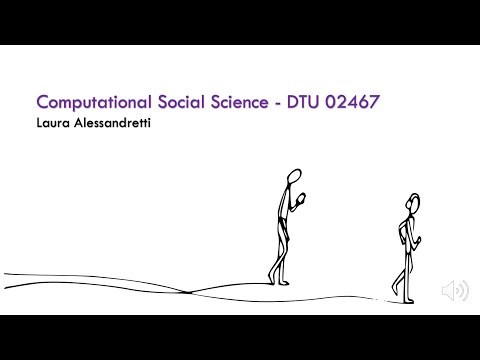

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("oLSdlg3PUO0",width=800, height=450)


Before even starting visualizing some cool data, I just want to give a few more practical tips for making good plots in matplotlib. Unless you feel like you are already a pro-visualizer, those should be pretty useful to make your plots look much nicer. 
Paying attention to details can make an incredible difference when we present our work to others. 

**Note**: there are many Python libraries to make visualizations. I am a huge fan of matplotlib, which is one of the most widely used ones, so this is what we will use for this class. 

> *Video Lecture*: [How to improve your plots](https://www.youtube.com/watch?v=sdszHGaP_ag)

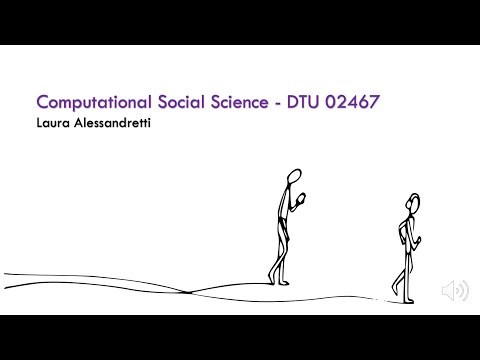

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("sdszHGaP_ag",width=800, height=450)


## Part 3: Visualizing distributions

Relying solely on summary statistics like the mean, median, and standard deviation to understand your dataset can sometimes be misleading. It's very good practice, to begin your analysis by visualizing the data distribution. Observing the probability distribution of data points can reveal a wealth of insights.

The problem is that real-world datasets often cover a wide range of values, spanning several orders of magnitude. Hence, basic methods of plotting histograms may not effectively represent these datasets. However, there are techniques to address this challenge and enhance visualization.

In the video lecture below, I demonstrate how to plot histograms for datasets with significant heterogeneity. The techniques are shown using two examples: a financial dataset on stock prices and returns, and data on the number of comments posted by Reddit users. But these methods are universally applicable. You can use them to visualize any type of data.


> *Video Lecture*: [Plotting histograms and distributions](https://www.youtube.com/watch?v=UpwEsguMtY4)

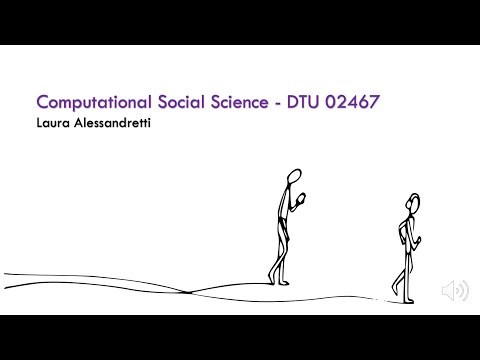

In [186]:

YouTubeVideo("UpwEsguMtY4",width=800, height=450)

> **Exercise 3: Analyzing Paper Citations**  In this exercise, we aim to explore the distribution of citations per author within the field of Computational Social Science. Our objectives are twofold:
> - *Learn to Plot Distributions:* We'll tackle the challenge of visualizing distributions for heterogeneous data, a common scenario in Computational Social Science.
> - *Investigate Author Recognition:* We'll analyze how recognition (measured in citations) varies for Computational Social Scientists from different countries.
>   
> **Dataset:** Use the "Authors dataset" you prepared in Exercise 2.
> 
> **Tasks:**
> 1. **Data Preparation:**
>    - Extract the total number of citations for each author from the dataset and store this information in an array.
> 2. **Plotting the Overall Citation Distribution:**
>    - Use [`numpy.histogram`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) to create a histogram of citations per author. Consider the following when plotting your histogram:
>        - **Number of bins:** The default behavior of `numpy.histogram` is to create 10 equally spaced bins. However, you should customize this to suit your data. Experiment with different numbers and sizes of bins to find the most informative visualization. Too few bins may oversimplify your data, while too many can result in a fragmented appearance.
>        - **Linear vs. Logarithmic Binning** Choose the approrpiate binning:
>          - Use *logarithmic binning* for heterogeneous data that has many extreme values (usuall in the right tail), creating bins with `numpy.logspace`.
>          - Else, use *linear binning*, creating bins with `numpy.linspace`.
>      - **Normalization** Where appropriate, you can convert your histogram into a Probability Density Function:
>        - set the `density=True` argument in `numpy.histogram`. This normalizes the histogram so the area under the curve equals 1, providing insights into the probability distribution of citations.
>
> 3. **Comparative Histograms by Country:**
>    - Identify the top 5 countries by the number of authors. For each of these countries, plot the distribution of ciations per author (as a line plot). Overlay these histograms on the same figure for comparison.
>
> 4. **Binning Decision:**
>    - Discuss whether you chose linear or logarithmic binning for the histograms in tasks 2 and 3 and justify your choice.
>
> 5. **Normalization Decision:**
>    - Explain whether you normalized the histograms and why. Describe in your own words the difference between normalized and non-normalized histograms.
>
> 6. **Analysis of Recognition Distribution:**
>    - Analyze the plotted distributions to comment on how author recognition, as indicated by citation numbers, varies among authors in the whole dataset, as well as across the selected countries. In your answer, include a comment on the following aspects: the range of values that the distributions span along the x and y axes; the presence of extreme values or outliers; differences in trends across countries. 


This is the end of today's class :) [And here a little comic to end on a happy note](https://www.reddit.com/media?url=https%3A%2F%2Fi.redd.it%2F8xor77e2nh971.png)

